<a href="https://colab.research.google.com/github/takumi0706/IntroductionMLByPython/blob/main/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install chainer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chainer: filename=chainer-7.8.1-py3-none-any.whl size=967716 sha256=1aa256527cac51a801b609e175d738a52a0db2f8182568b88c45d6d885d5a9f7
  Stored in directory: /root/.cache/pip/wheels/c4/95/6a/16014db6f761c4e742755b64aac60dbe142da1df6c5919f790
Successfully built chainer


In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable, Chain, config

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

D = 100
N = 2
xdata = np.random.randn(D*N).reshape(D,N).astype(np.float32)

def f(x):
  y = x*x
  return y

tdata = (xdata[:,1] > f(xdata[:,0])).astype(np.int32)

In [ ]:
C = 2
NN = Chain(l1 = L.Linear(N,C))

In [ ]:
def model(x):
  y = NN.l1(x)
  return y

In [ ]:
ydata = model(xdata)
print(ydata)

variable([[ 2.10894561e+00 -2.09740925e+00]
          [-2.32718182e+00 -8.58253896e-01]
          [ 7.68226266e-01 -6.52255833e-01]
          [ 1.45460606e+00 -1.91790962e+00]
          [ 8.68484855e-01  2.58099937e+00]
          [ 3.57281864e-01  9.24026251e-01]
          [ 2.72176123e+00 -3.56048107e+00]
          [-1.50151753e+00  4.10596579e-01]
          [ 6.88681230e-02  1.89469740e-01]
          [ 5.89387953e-01 -1.09049380e+00]
          [-1.30992508e+00  1.56321394e+00]
          [-1.66949880e+00  1.86529076e+00]
          [ 1.51635599e+00  4.91658300e-01]
          [ 8.25349927e-01 -6.08802319e-01]
          [-6.96986973e-01 -1.46635306e+00]
          [ 2.10075557e-01 -5.64707398e-01]
          [ 1.32853901e+00  2.51113391e+00]
          [ 1.87087870e+00 -9.69146788e-01]
          [-2.41033554e+00  9.28230405e-01]
          [-3.11469412e+00  2.84673738e+00]
          [ 7.72641376e-02  1.04402447e+00]
          [-2.04166341e+00  7.57144809e-01]
          [-7.82936633e-01  1.17

In [ ]:
acc = F.accuracy(ydata,tdata)
print(acc)

variable(0.81)


In [ ]:
optNN = Opt.SGD()
optNN.setup(NN)

In [ ]:
# 誤差関数の記録用
loss_series = []
# 成績の記録用
acc_series = []

In [ ]:
T = 5000
for time in range(T):
  # 学習を許可
  config.train = True
  # 初期化
  # optNN.target = NN
  optNN.target.zerograds()
  # 現状のニューラルネットワークを利用
  ydata = model(xdata)
  # 誤差関数の計算
  loss = F.softmax_cross_entropy(ydata,tdata)
  # 現状の成績チェック
  acc = F.accuracy(ydata,tdata)
  # 誤差逆伝搬法を実行
  loss.backward()
  # 誤差を修正
  optNN.update()

  # ログを記録
  loss_series.append(loss.data)
  acc_series.append(acc.data)

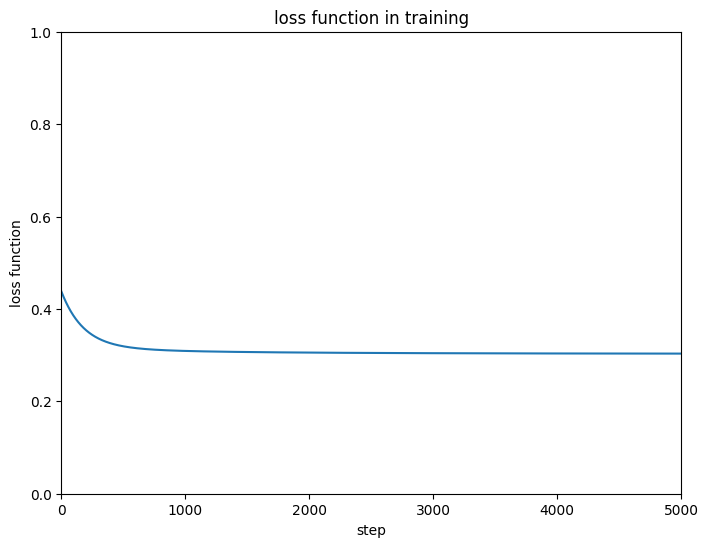

In [ ]:
# loss_seriesの長さ
Tall = len(loss_series)
# 横が８，縦が６
plt.figure(figsize=(8,6))
# 横に学習回数、縦に各回における誤差巻子の数値
plt.plot(range(Tall),loss_series)
plt.title("loss function in training")
plt.xlabel("step")
plt.ylabel("loss function")
# 幅のリミット
plt.xlim([0,Tall])
plt.ylim([0,1])
plt.show()

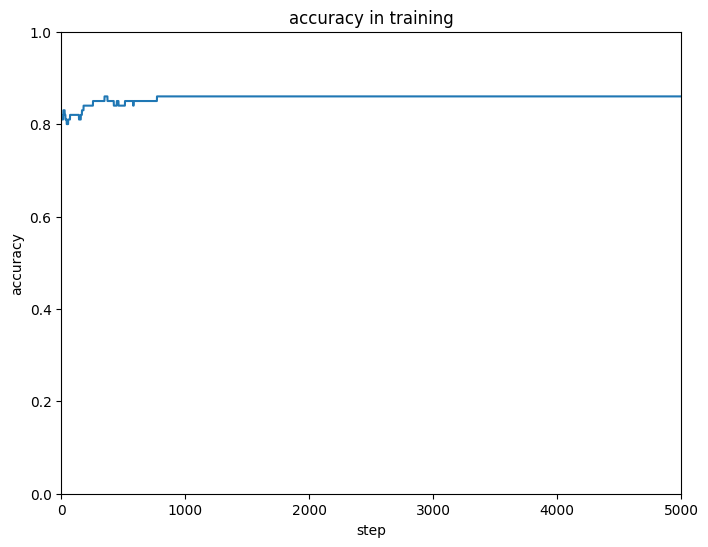

In [ ]:
Tall = len(acc_series)
plt.figure(figsize=(8,6))
plt.plot(range(Tall),acc_series)
plt.title("accuracy in training")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.xlim([0,Tall])
plt.ylim([0,1])
plt.show()

In [ ]:
C = 2
# L.Linear(入力数,出力数)
NN = Chain(l1 = L.Linear(N,4), l2 = L.Linear(4,C))

In [ ]:
# l1の線形変換後に非線形変換をしてからl2の線形変換をする
def model(x):
  h = NN.l1(x)
  h = F.sigmoid(h)
  y = NN.l2(h)
  return y

In [ ]:
# 再びSGD方法で学習
optNN = Opt.SGD()
optNN.setup(NN)

# 保存場所
loss_series = []
acc_series = []

# 学習(間に非線形変換)
T = 20000
for time in range(T):
  config.train = True
  optNN.target.zerograds()
  ydata = model(xdata)
  loss = F.softmax_cross_entropy(ydata,tdata)
  acc = F.accuracy(ydata,tdata)
  loss.backward()
  optNN.update()

  loss_series.append(loss.data)
  acc_series.append(acc.data)

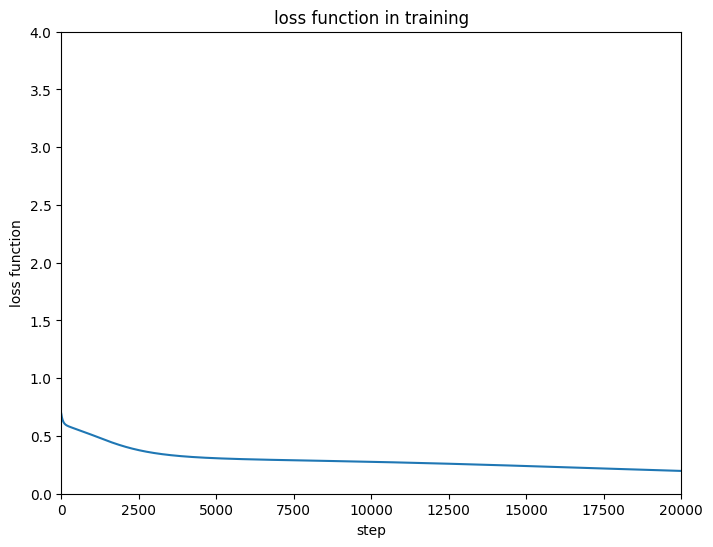

In [ ]:
Tall = len(loss_series)
plt.figure(figsize=(8,6))
# 横に学習回数、縦に各回における誤差巻子の数値
plt.plot(range(Tall),loss_series)
plt.title("loss function in training")
plt.xlabel("step")
plt.ylabel("loss function")
# 幅のリミット
plt.xlim([0,Tall])
plt.ylim([0,4])
plt.show()

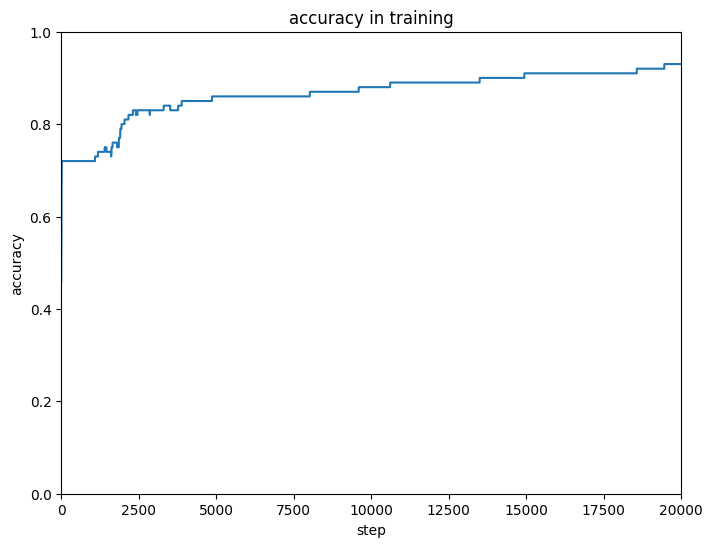

In [ ]:
Tall = len(acc_series)
plt.figure(figsize=(8,6))
plt.plot(range(Tall),acc_series)
plt.title("accuracy in training")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.xlim([0,Tall])
plt.ylim([0,1])
plt.show()

# Chapter1
## ニューラルネットワークを作る
2024/06/17